## Bcktesting using Zipline

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%load_ext zipline

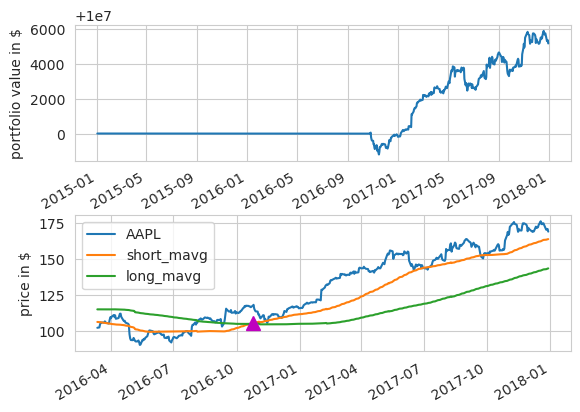

,period_open,period_close,returns,starting_exposure,ending_value,long_exposure,starting_value,shorts_count,ending_cash,net_leverage,...,benchmark_period_return,benchmark_volatility,treasury_period_return,sharpe,alpha,beta,max_leverage,AAPL,short_mavg,long_mavg
2015-01-02 21:00:00+00:00,2015-01-02 14:31:00+00:00,2015-01-02 21:00:00+00:00,0.000000e+00,0.0,0.0,0.0,0.0,0,1.000000e+07,0.000000,...,0.0,NaN,0.0,NaN,None,None,0.000000,NaN,NaN,NaN
2015-01-05 21:00:00+00:00,2015-01-05 14:31:00+00:00,2015-01-05 21:00:00+00:00,0.000000e+00,0.0,0.0,0.0,0.0,0,1.000000e+07,0.000000,...,0.0,0.0,0.0,NaN,None,None,0.000000,NaN,NaN,NaN
2015-01-06 21:00:00+00:00,2015-01-06 14:31:00+00:00,2015-01-06 21:00:00+00:00,0.000000e+00,0.0,0.0,0.0,0.0,0,1.000000e+07,0.000000,...,0.0,0.0,0.0,NaN,None,None,0.000000,NaN,NaN,NaN
2015-01-07 21:00:00+00:00,2015-01-07 14:31:00+00:00,2015-01-07 21:00:00+00:00,0.000000e+00,0.0,0.0,0.0,0.0,0,1.000000e+07,0.000000,...,0.0,0.0,0.0,NaN,None,None,0.000000,NaN,NaN,NaN
2015-01-08 21:00:00+00:00,2015-01-08 14:31:00+00:00,2015-01-08 21:00:00+00:00,0.000000e+00,0.0,0.0,0.0,0.0,0,1.000000e+07,0.000000,...,0.0,0.0,0.0,NaN,None,None,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22 21:00:00+00:00,2017-12-22 14:31:00+00:00,2017-12-22 21:00:00+00:00,0.000000e+00,17501.0,17501.0,17501.0,17501.0,0,9.988229e+06,0.001749,...,0.0,0.0,0.0,1.195147,None,None,0.001763,175.01,163.442190,142.891860
2017-12-26 21:00:00+00:00,2017-12-26 14:31:00+00:00,2017-12-26 21:00:00+00:00,-4.437457e-05,17501.0,17057.0,17057.0,17501.0,0,9.988229e+06,0.001705,...,0.0,0.0,0.0,1.087563,None,None,0.001763,170.57,163.598280,143.075387
2017-12-27 21:00:00+00:00,2017-12-27 14:31:00+00:00,2017-12-27 21:00:00+00:00,2.998415e-07,17057.0,17060.0,17060.0,17057.0,0,9.988229e+06,0.001705,...,0.0,0.0,0.0,1.087458,None,None,0.001763,170.60,163.746503,143.259273
2017-12-28 21:00:00+00:00,2017-12-28 14:31:00+00:00,2017-12-28 21:00:00+00:00,4.797463e-06,17060.0,17108.0,17108.0,17060.0,0,9.988229e+06,0.001710,...,0.0,0.0,0.0,1.096480,None,None,0.001763,171.08,163.899520,143.445907


In [6]:
%%zipline --start 2015-1-1 --end 2018-1-1 --output single_factor.pickle --no-benchmark --bundle quandl


from zipline.api import order, record, symbol
from zipline.finance import commission, slippage


from zipline.api import order_target, record, symbol
import matplotlib.pyplot as plt

def initialize(context):
    context.i = 0
    context.asset = symbol('AAPL')


def handle_data(context, data):
    # Skip first 300 days to get full windows
    context.i += 1
    if context.i < 300:
        return

    # Compute averages
    # data.history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = data.history(context.asset, 'price', bar_count=100, frequency="1d").mean()
    long_mavg = data.history(context.asset, 'price', bar_count=300, frequency="1d").mean()

    # Trading logic
    if short_mavg > long_mavg:
        # order_target orders as many shares as needed to
        # achieve the desired number of shares.
        order_target(context.asset, 100)
    elif short_mavg < long_mavg:
        order_target(context.asset, 0)

    # Save values for later inspection
    record(AAPL=data.current(context.asset, 'price'),
           short_mavg=short_mavg,
           long_mavg=long_mavg)


def analyze(context, perf):
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    perf.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('portfolio value in $')

    ax2 = fig.add_subplot(212)
    perf['AAPL'].plot(ax=ax2)
    perf[['short_mavg', 'long_mavg']].plot(ax=ax2)

    perf_trans = perf.loc[[t != [] for t in perf.transactions]]
    buys = perf_trans.loc[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.loc[
        [t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax2.plot(buys.index, perf.short_mavg.loc[buys.index],
             '^', markersize=10, color='m')
    ax2.plot(sells.index, perf.short_mavg.loc[sells.index],
             'v', markersize=10, color='k')
    ax2.set_ylabel('price in $')
    
    fig.subplots_adjust(hspace=0.4)
    plt.legend(loc=0)
    plt.show()





In [7]:
%%zipline --start 2015-1-1 --end 2018-1-1 --output single_factor.pickle --no-benchmark --bundle quandl

from zipline.api import (
    attach_pipeline,
    date_rules,
    time_rules,
    order_target_percent,
    pipeline_output,
    record,
    schedule_function,
    get_open_orders,
    calendars
)
from zipline.finance import commission, slippage
from zipline.pipeline import Pipeline, CustomFactor
from zipline.pipeline.factors import Returns, AverageDollarVolume
import numpy as np
import pandas as pd

MONTH = 21
YEAR = 12 * MONTH
N_LONGS = N_SHORTS = 25
VOL_SCREEN = 1000


class MeanReversion(CustomFactor):
    """Compute ratio of latest monthly return to 12m average,
       normalized by std dev of monthly returns"""
    inputs = [Returns(window_length=MONTH)]
    window_length = YEAR

    def compute(self, today, assets, out, monthly_returns):
        df = pd.DataFrame(monthly_returns)
        out[:] = df.iloc[-1].sub(df.mean()).div(df.std())


def compute_factors():
    """Create factor pipeline incl. mean reversion,
        filtered by 30d Dollar Volume; capture factor ranks"""
    mean_reversion = MeanReversion()
    dollar_volume = AverageDollarVolume(window_length=30)
    return Pipeline(columns={'longs': mean_reversion.bottom(N_LONGS),
                             'shorts': mean_reversion.top(N_SHORTS),
                             'ranking': mean_reversion.rank(ascending=False)},
                    screen=dollar_volume.top(VOL_SCREEN))


def exec_trades(data, assets, target_percent):
    """Place orders for assets using target portfolio percentage"""
    for asset in assets:
        if data.can_trade(asset) and not get_open_orders(asset):
            order_target_percent(asset, target_percent)


def rebalance(context, data):
    """Compute long, short and obsolete holdings; place trade orders"""
    factor_data = context.factor_data
    record(factor_data=factor_data.ranking)

    assets = factor_data.index
    record(prices=data.current(assets, 'price'))

    longs = assets[factor_data.longs]
    shorts = assets[factor_data.shorts]
    divest = set(context.portfolio.positions.keys()) - set(longs.union(shorts))

    exec_trades(data, assets=divest, target_percent=0)
    exec_trades(data, assets=longs, target_percent=1 / N_LONGS)
    exec_trades(data, assets=shorts, target_percent=-1 / N_SHORTS)


def initialize(context):
    """Setup: register pipeline, schedule rebalancing,
        and set trading params"""
    attach_pipeline(compute_factors(), 'factor_pipeline')
    schedule_function(rebalance,
                      date_rules.week_start(),
                      time_rules.market_open(),
                      calendar=calendars.US_EQUITIES)
    context.set_commission(commission.PerShare(cost=.01, min_trade_cost=0))
    context.set_slippage(slippage.VolumeShareSlippage())


def before_trading_start(context, data):
    """Run factor pipeline"""
    context.factor_data = pipeline_output('factor_pipeline')


,period_open,period_close,pnl,transactions,portfolio_value,net_leverage,ending_exposure,longs_count,orders,long_value,...,benchmark_volatility,alpha,beta,algorithm_period_return,sharpe,trading_days,treasury_period_return,period_label,factor_data,prices
2015-01-02 21:00:00+00:00,2015-01-02 14:31:00+00:00,2015-01-02 21:00:00+00:00,0.000000,[],1.000000e+07,0.000000,0.000,0,[],0.000,...,NaN,None,None,0.000000,NaN,1,0.0,2015-01,NaN,NaN
2015-01-05 21:00:00+00:00,2015-01-05 14:31:00+00:00,2015-01-05 21:00:00+00:00,0.000000,[],1.000000e+07,0.000000,0.000,0,"[{'id': 'e8f4e6bb15954aac929ffc694957e339', 'd...",0.000,...,0.0,None,None,0.000000,NaN,2,0.0,2015-01,Equity(0 [A]) 2707.0 Equity(2 [AAL]) ...,Equity(0 [A]) 39.800 Equity(2 [AAL])...
2015-01-06 21:00:00+00:00,2015-01-06 14:31:00+00:00,2015-01-06 21:00:00+00:00,-3799.475085,"[{'amount': 18433, 'dt': 2015-01-06 21:00:00+0...",9.996201e+06,0.311545,3114262.860,12,"[{'id': 'e8f4e6bb15954aac929ffc694957e339', 'd...",4731525.565,...,0.0,None,None,-0.000380,-9.165151,3,0.0,2015-01,Equity(0 [A]) 2707.0 Equity(2 [AAL]) ...,Equity(0 [A]) 39.800 Equity(2 [AAL])...
2015-01-07 21:00:00+00:00,2015-01-07 14:31:00+00:00,2015-01-07 21:00:00+00:00,12850.580000,[],1.000905e+07,0.312429,3127113.440,12,[],4757100.850,...,0.0,None,None,0.000905,4.933673,4,0.0,2015-01,Equity(0 [A]) 2707.0 Equity(2 [AAL]) ...,Equity(0 [A]) 39.800 Equity(2 [AAL])...
2015-01-08 21:00:00+00:00,2015-01-08 14:31:00+00:00,2015-01-08 21:00:00+00:00,63721.760000,[],1.007277e+07,0.316778,3190835.200,12,[],4835941.280,...,0.0,None,None,0.007277,8.194658,5,0.0,2015-01,Equity(0 [A]) 2707.0 Equity(2 [AAL]) ...,Equity(0 [A]) 39.800 Equity(2 [AAL])...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22 21:00:00+00:00,2017-12-22 14:31:00+00:00,2017-12-22 21:00:00+00:00,-16960.030000,[],1.102076e+07,0.060637,668261.720,12,[],5266915.040,...,0.0,None,None,0.102076,0.406793,751,0.0,2017-12,Equity(0 [A]) 2393.0 Equity(1 [AA]) ...,Equity(0 [A]) 67.66 Equity(1 [AA]) ...
2017-12-26 21:00:00+00:00,2017-12-26 14:31:00+00:00,2017-12-26 21:00:00+00:00,-43497.970000,[],1.097727e+07,0.056914,624763.750,12,"[{'id': '563fab8fdf1043d7804389ea1add63e4', 'd...",5217746.950,...,0.0,None,None,0.097727,0.391704,752,0.0,2017-12,Equity(0 [A]) 2363.0 Equity(1 [AA]) ...,Equity(0 [A]) 67.25 Equity(1 [AA]) ...
2017-12-27 21:00:00+00:00,2017-12-27 14:31:00+00:00,2017-12-27 21:00:00+00:00,41248.841483,"[{'amount': 10147, 'dt': 2017-12-27 21:00:00+0...",1.101852e+07,-0.115631,-1274086.885,9,"[{'id': '563fab8fdf1043d7804389ea1add63e4', 'd...",3966687.510,...,0.0,None,None,0.101852,0.405300,753,0.0,2017-12,Equity(0 [A]) 2363.0 Equity(1 [AA]) ...,Equity(0 [A]) 67.25 Equity(1 [AA]) ...
2017-12-28 21:00:00+00:00,2017-12-28 14:31:00+00:00,2017-12-28 21:00:00+00:00,25543.807669,"[{'amount': 2082, 'dt': 2017-12-28 21:00:00+00...",1.104406e+07,-0.107850,-1191100.685,9,"[{'id': '5be100259bc74a988c4a97b772e10459', 'd...",3967663.630,...,0.0,None,None,0.104406,0.413599,754,0.0,2017-12,Equity(0 [A]) 2363.0 Equity(1 [AA]) ...,Equity(0 [A]) 67.25 Equity(1 [AA]) ...
